In [8]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
experiments = pd.read_csv('experiments.csv')
experiments

,trial id,trial name,EMG,Speaker reference list,Speaker feedback,Num characters,Time delay (ms),time (s),errors,accuracy,itr,subject,reference,encoding input,decoding output,raw encoding input,raw decoding output,Comments
0,1,e1,1,0,0,50,1500,120,1,0.98,77.93,None,"2, 2, 8, 9, 9, 5, 9, 6, 9, 4, 2, 0, 5, 3, 6, 0...","2, 2, 8, 9, 9, 8, -1, 5, -1, 9, 6, 9, 4, 2, 0,...",NaN,"2, 2, 8, 9, 9, 8, -1, 5, -1, 9, 6, 9, 4, 2, 0,...",NaN,NaN
1,2,e2,1,0,0,50,1500,113,2,0.96,78.40,None,"8, 8, 3, 1, 8, 7, 9, 4, 6, 6, 0, 9, 8, 3, 4, 2...","8, 8, 3, 1, 8, -2, 9, 4, 6, 6, 0, 9, 8, 3, 4, ...",NaN,NaN,NaN,NaN
2,3,e3,0,1,0,50,1500,71,7,0.86,96.93,None,"0, 4, 5, 9, 9, 6, 2, 1, 8, 3, 3, 7, 3, 5, 0, 0...","0, 4, 5, 9, 9, 6, 2, 1, 8, 3, 3, 3, 2, 5, 0, 0...",NaN,"0, 4, 5, 9, 9, 6, 2, 1, 8, 3, 3, 3, 2, 5, 0, 0...",NaN,NaN
3,4,e4,0,0,0,50,1500,60,10,0.80,98.30,None,"9, 0, 9, 0, 2, 7, 6, 6, 7, 1, 3, 3, 6, 5, 5, 5...","9, 0, 9, 0, 2, 2, 6, 6, 7, 1, 3, 3, 6, 5, 5, 5...",NaN,NaN,NaN,NaN
4,5,e11,1,1,0,50,1500,112,2,0.90,67.93,None,"4, 3, 3, 5, 8, 9, 9, 2, 1, 7, 1, 3, 0, 8, 0, 0...","4, 3, 3, -2, 8, -2, -2, 2, 1, 7, 1, 3, 0, 8, 0...",NaN,"4, 3, 3, 6, -1, 8, 9, -1, 2, 1, 7, 1, 3, 0, 8,...",NaN,NaN
5,6,e12,1,1,0,50,1500,79,0,1.00,126.15,None,"4, 8, 1, 5, 2, 0, 1, 1, 8, 7, 3, 4, 2, 2, 1, 7...","4, 8, 1, 5, 2, 0, 1, 1, 8, 7, 3, 4, 2, 2, 1, 7...",NaN,"4, 8, 1, 5, 1, -1, 2, 0, 1, 6, -1, 1, 8, 7, 3,...",NaN,NaN
6,7,e15,1,0,1,50,1500,130,6,0.88,55.67,None,"9, 6, 0, 9, 7, 5, 1, 9, 7, 5, 9, 1, 0, 3, 4, 3...","9, 6, 0, 9, 7, 5, 1, 9, 7, 6, 5, -2, 0, 3, 4, ...",NaN,"9, 6, 0, 6, -1, 9, 7, 5, 1, 9, 7, 8, -1, 8, -1...",NaN,NaN
7,8,e13,1,1,0,50,1500,104,3,0.94,80.89,None,"0, 4, 4, 3, 5, 5, 8, 4, 8, 9, 8, 6, 2, 6, 4, 9...","0, 4, 4, 3, 5, 5, 8, 4, 8, 9, 8, 6, 2, 6, 4, 9...",NaN,"0, 4, 4, 3, 8, -1, 8, -1, 6, -1, 5, 5, 8, 4, 8...",NaN,NaN
8,9,e14,1,0,1,50,1500,102,0,1.00,97.70,None,"4, 6, 0, 9, 3, 9, 7, 2, 5, 5, 1, 2, 6, 7, 4, 3...","4, 6, 0, 9, 3, 9, 7, 2, 5, 5, 1, 2, 6, 7, 4, 3...",NaN,"4, 6, 0, 9, 3, 9, 7, 2, 5, 5, 1, 4, -1, -1, 2,...",NaN,NaN
9,10,e8,1,0,1,50,1500,106,4,0.92,75.46,None,"3, 8, 8, 3, 3, 1, 6, 4, 3, 4, 1, 1, 4, 3, 2, 2...","3, 8, 8, 3, 3, 4, 7, -2, -2, 4, 1, 1, 4, 3, 2,...",NaN,"5, -1, 3, 8, 8, 3, 3, 6, -1, -1, -1, 4, 2, -1,...",NaN,NaN


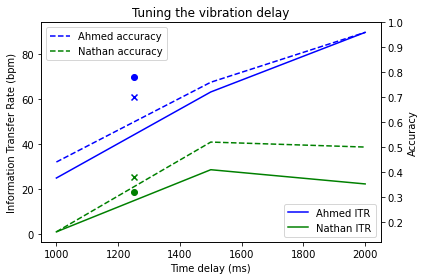

In [26]:
# Plot the difference in ITR and accuracy for different time delays.

# Get all t trials
t_trials = experiments[experiments['trial name'].str.contains('t')]
t_trials_a = t_trials[t_trials['subject'] == 'Ahmed']
t_trials_n = t_trials[t_trials['subject'] == 'Nathan']

# Add the trials to the figure.
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time delay (ms)')
ax1.set_ylabel('Information Transfer Rate (bpm)')
ax1.plot(t_trials_a['Time delay (ms)'][:-1], t_trials_a['itr'][:-1], color='blue', label='Ahmed ITR')
ax1.plot(t_trials_n['Time delay (ms)'][:-1], t_trials_n['itr'][:-1], color='green', label='Nathan ITR')
ax1.scatter(t_trials_a['Time delay (ms)'].iloc[-1], t_trials_a['itr'].iloc[-1], color='blue')
ax1.scatter(t_trials_n['Time delay (ms)'].iloc[-1], t_trials_n['itr'].iloc[-1], color='green')
ax1.legend(loc='lower right')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy')
ax2.plot(t_trials_a['Time delay (ms)'][:-1], t_trials_a['accuracy'][:-1], color='blue', label='Ahmed accuracy', linestyle='--')
ax2.plot(t_trials_n['Time delay (ms)'][:-1], t_trials_n['accuracy'][:-1], color='green', label='Nathan accuracy', linestyle='--')
ax2.scatter(t_trials_a['Time delay (ms)'].iloc[-1], t_trials_a['accuracy'].iloc[-1], color='blue', marker='x')
ax2.scatter(t_trials_n['Time delay (ms)'].iloc[-1], t_trials_n['accuracy'].iloc[-1], color='green', marker='x')
ax2.legend(loc='upper left')

plt.title('Tuning the vibration delay')
fig.tight_layout()
plt.show()